In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## importing libraries ##


In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## loading the data sets ##

In [7]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
     for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        if len(paths) == 2800:
            break
print('Dataset is Loaded')

Dataset is Loaded


In [8]:
# create a data frame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head() 

speech label
0  /kaggle/input/toronto-emotional-speech-set-tes...  fear
1  /kaggle/input/toronto-emotional-speech-set-tes...  fear
2  /kaggle/input/toronto-emotional-speech-set-tes...  fear
3  /kaggle/input/toronto-emotional-speech-set-tes...  fear
4  /kaggle/input/toronto-emotional-speech-set-tes...  fear

In [9]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

## Exploratory Data Analysis ##

<Axes: xlabel='label', ylabel='count'>

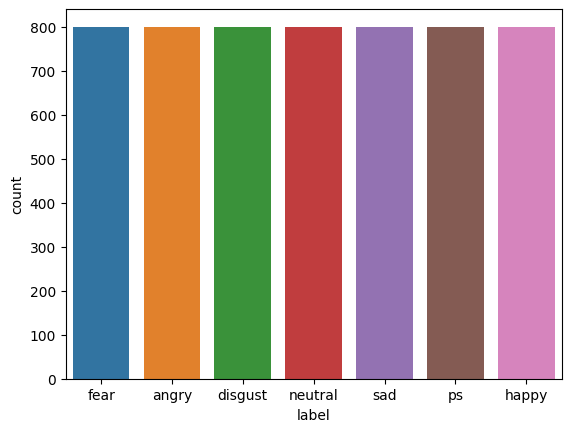

In [10]:
sns.countplot(data=df, x='label')

In [12]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

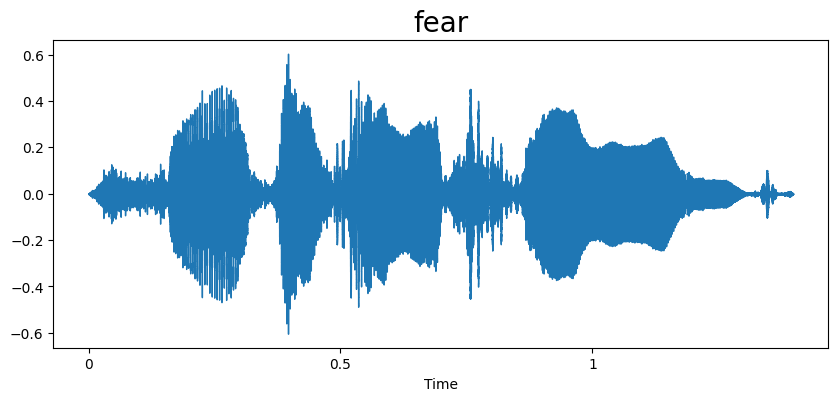

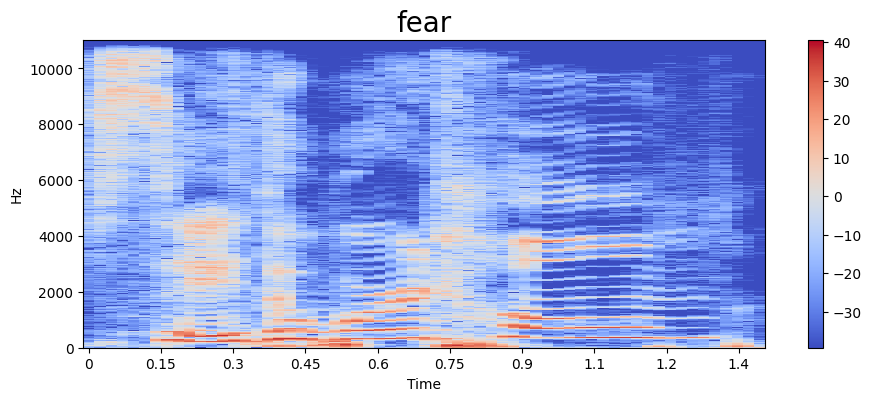

In [64]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

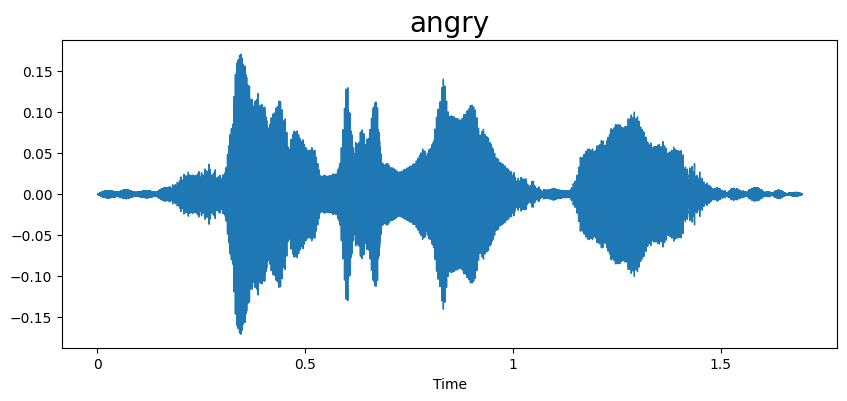

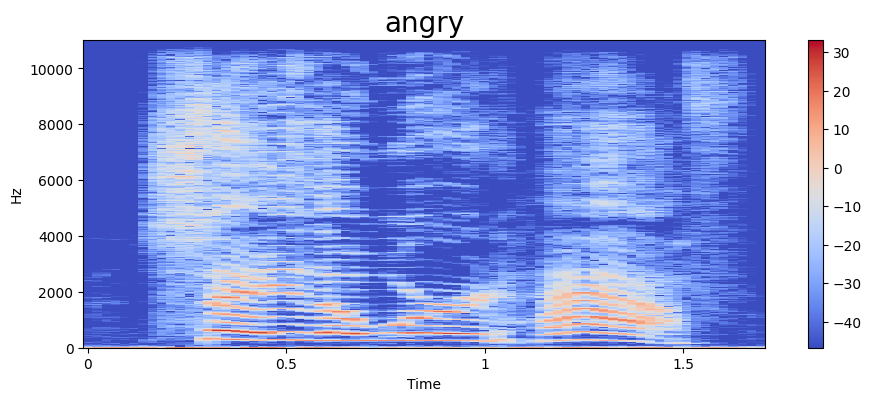

In [65]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

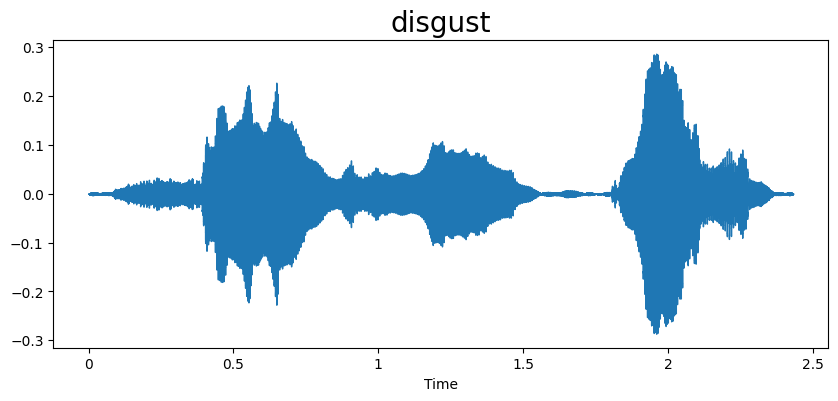

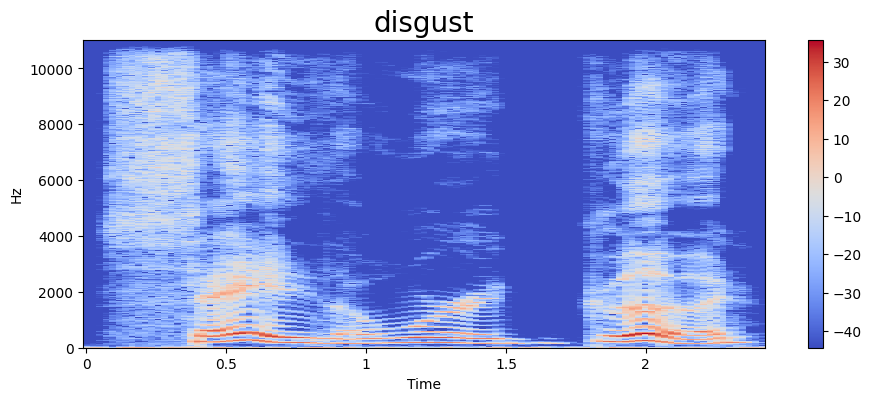

In [66]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

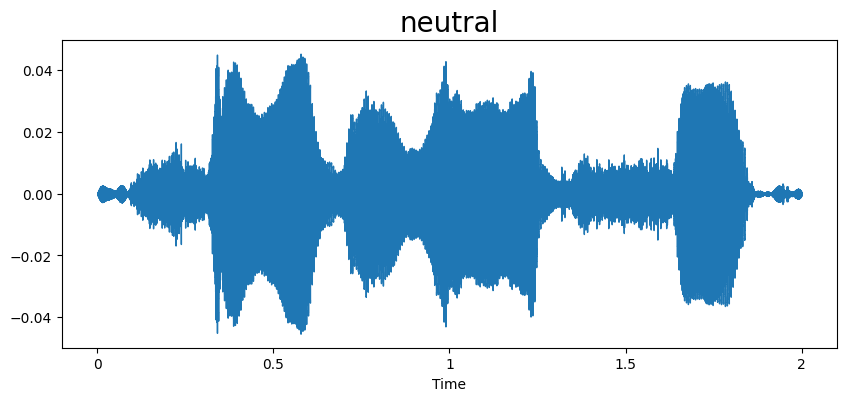

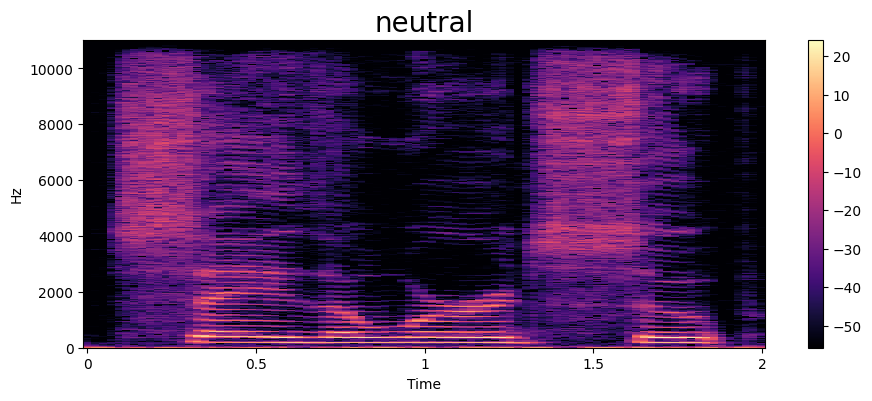

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

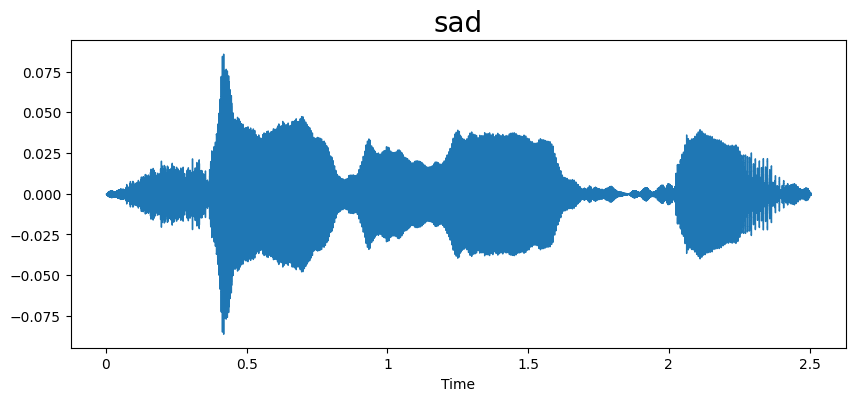

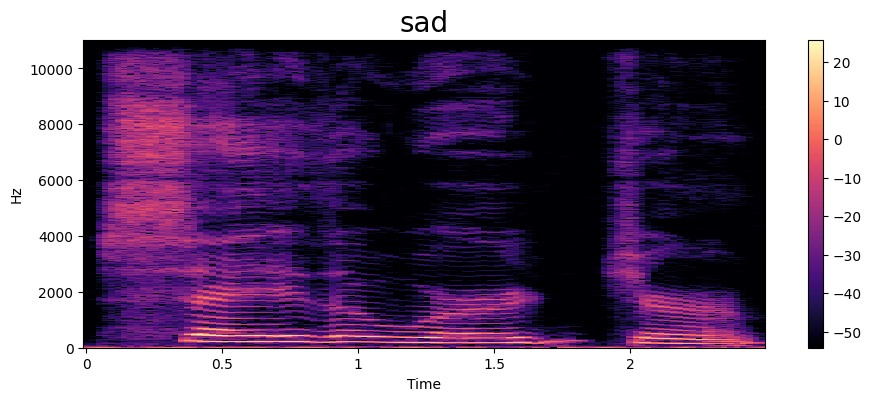

In [68]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

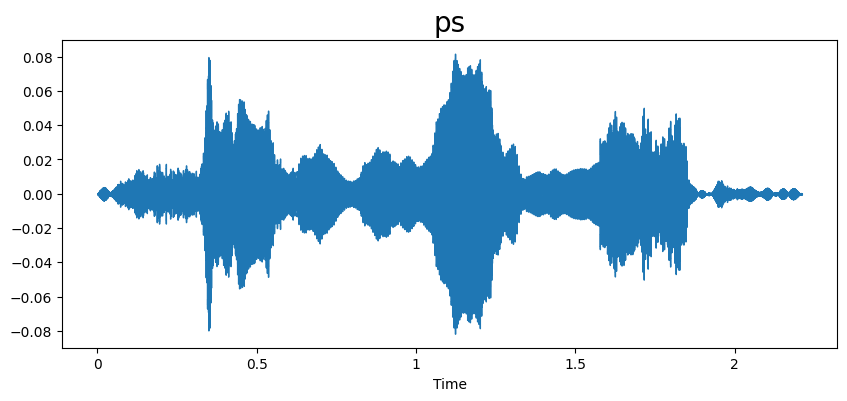

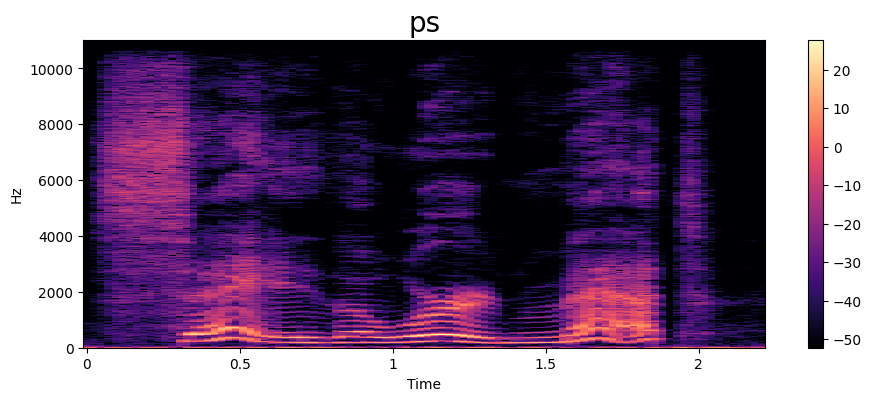

In [69]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

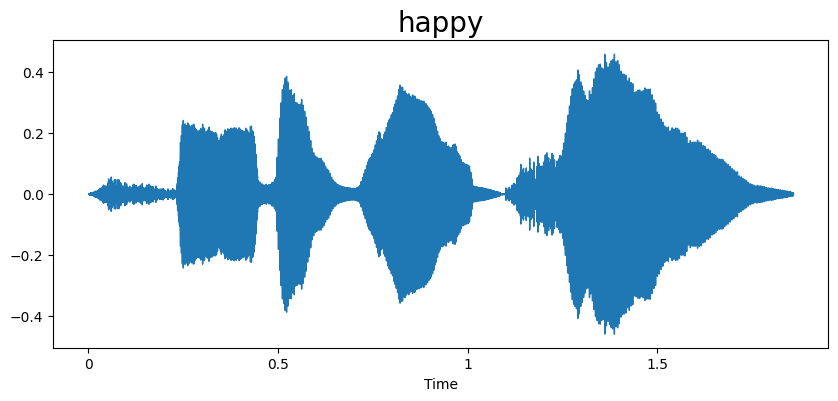

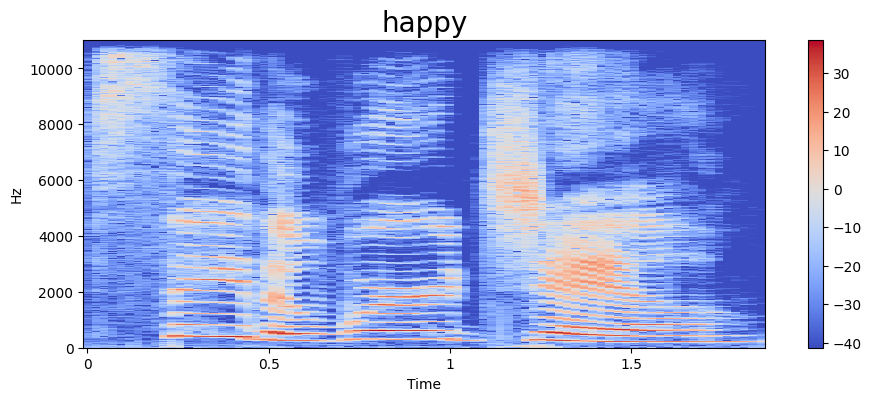

In [70]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction ##

In [71]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [72]:
extract_mfcc(df['speech'][0])

array([-285.73727  ,   85.78295  ,   -2.1689117,   22.125532 ,
        -14.757396 ,   11.051347 ,   12.412449 ,   -3.000262 ,
          1.0844985,   11.078271 ,  -17.41966  ,   -8.093213 ,
          6.5879736,   -4.2209525,   -9.15508  ,    3.5214796,
        -13.186381 ,   14.078853 ,   19.66973  ,   22.725618 ,
         32.57464  ,   16.325033 ,   -3.8427284,    0.8962967,
        -11.239264 ,    6.653461 ,   -2.5883694,   -7.7140164,
        -10.941657 ,   -2.4007552,   -5.2812862,    4.271157 ,
        -11.202216 ,   -9.024621 ,   -3.666985 ,    4.8697433,
         -1.6027987,    2.5600514,   11.454374 ,   11.233449 ],
      dtype=float32)

In [74]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [76]:
X_mfcc

0       [-285.73727, 85.78295, -2.1689117, 22.125532, ...
1       [-348.34332, 35.193233, -3.8413284, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.02505877, 8.431058, -...
5596    [-313.96478, 39.847843, -5.6493053, -3.8675754...
5597    [-357.54886, 77.88605, -15.224756, 2.194633, -...
5598    [-353.1474, 101.68391, -14.175897, -12.037376,...
5599    [-389.4595, 54.042767, 1.3469982, -1.4258989, ...
Name: speech, Length: 5600, dtype: object

In [78]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [80]:
#input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [81]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [82]:
y = y.toarray()

In [83]:
y.shape

(5600, 7)

## Create The LSTM Model ##

In [84]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model = Sequential([
 LSTM(256, return_sequences=False, input_shape=(40,1)),
 Dropout(0.2),
 Dense(128, activation='relu'),
 Dropout(0.2),
 Dense(64, activation='relu'),
 Dropout(0.2),
 Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary() 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import Callback
import numpy as np

class EmotionCallback(Callback):
    def __init__(self, encoder, X, y, display_batch=False):
        super().__init__()
        self.encoder = encoder
        self.X = X
        self.y = y
        self.display_batch = display_batch

    def on_epoch_end(self, epoch, logs=None):
        if not self.display_batch:
            self.display_emotions()
        
    def on_batch_end(self, batch, logs=None):
        if self.display_batch:
            self.display_emotions()

    def display_emotions(self):
        predictions = self.model.predict(self.X)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = np.argmax(self.y, axis=1)
        
        label_map = {i: label for i, label in enumerate(self.encoder.categories_[0])}
        
        for i in range(len(predicted_labels)):
            print(f"File: {i+1}, Predicted Emotion: {label_map[predicted_labels[i]]}, True Emotion: {label_map[true_labels[i]]}")

# Initialize the OneHotEncoder with categories already fitted
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']]).toarray()

# Assume X and y are already prepared as per your previous code
X = np.expand_dims(X, -1)

# Create the model as defined earlier
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Use the custom callback during training
emotion_callback = EmotionCallback(enc, X, y, display_batch=False)  # Set display_batch to True to display per batch

history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, callbacks=[emotion_callback])

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step
File: 1, Predicted Emotion: fear, True Emotion: fear
File: 2, Predicted Emotion: fear, True Emotion: fear
File: 3, Predicted Emotion: fear, True Emotion: fear
File: 4, Predicted Emotion: fear, True Emotion: fear
File: 5, Predicted Emotion: fear, True Emotion: fear
File: 6, Predicted Emotion: fear, True Emotion: fear
File: 7, Predicted Emotion: fear, True Emotion: fear
File: 8, Predicted Emotion: fear, True Emotion: fear
File: 9, Predicted Emotion: fear, True Emotion: fear
File: 10, Predicted Emotion: fear, True Emotion: fear
File: 11, Predicted Emotion: fear, True Emotion: fear
File: 12, Predicted Emotion: fear, True Emotion: fear
File: 13, Predicted Emotion: fear, True Emotion: fear
File: 14, Predicted Emotion: fear, True Emotion: fear
File: 15, Predicted Emotion: fear, True Emotion: fear
File: 16, Predicted Emotion: fear, True Emotion: fear
File: 17, Predicted Emotion: fear, True Emotion: fear
File: 18, Predicted Emotion: fear, Tru

In [88]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.9999 - loss: 5.9708e-04 - val_accuracy: 0.9991 - val_loss: 0.0011
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 2.2624e-04
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9993 - loss: 0.0087 - val_accuracy: 0.9973 - val_loss: 0.0054
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9965 - loss: 0.0149 - val_accuracy: 0.9946 - val_loss: 0.0141
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9965 - loss: 0.0120 - val_accuracy: 0.9946 - val_loss: 0.0139
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9970 - loss: 0.0062 - val_accuracy: 0.9991 - val_loss: 0.0024
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 1.0000 - loss: 6.2235e-04 - val_accuracy: 0.9991 - val_loss: 0.0018
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9999 - loss: 5.1532e-04 - val

## Plot The Result ## 

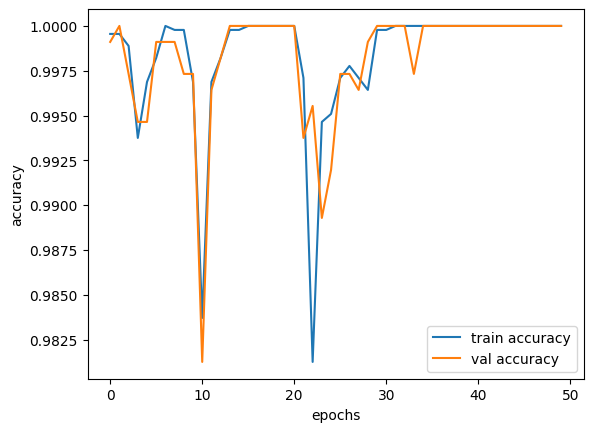

In [90]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

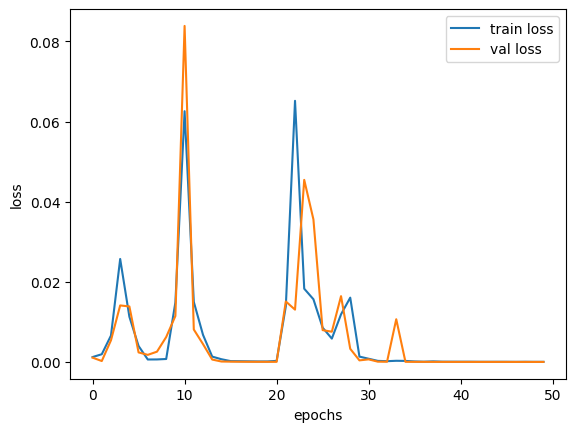

In [91]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()